# SI 618: Data Manipulation and Analysis
## 10 - Clustering

### <font color="magenta">Let's create data for our fun exercises later: Record your music preferences</font>

Fill in your music preferences on https://docs.google.com/spreadsheets/d/1nK6JZor9Xh3iZDnI_2CwPBS8Pq2rLuGbbjTedoUzwwc/edit?usp=sharing

Values should range from 1 to 10.  1=no way; 10=the best.  Please fill in a value for each column. 

We will be downloading the completed sheet to use as data for this class. Example exercise idea was Dr. Chris Teplovs'. I hope you have as much fun with it!


## NOW: Download the excel sheet as a .csv file

In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

import pandas as pd
import seaborn as sns

In [3]:
music = pd.read_csv('data/music_f20.csv')

In [4]:
music.head()

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
0,jaywang,8,10,8,6,6,6,7,7,7,7
1,Mei Yuan,6,7,7,5,8,9,8,5,10,8
2,Ceren,10,5,1,1,1,5,10,10,8,7
3,Lea,6,6,9,3,9,3,3,2,9,4
4,Yixin,4,6,6,4,6,5,5,5,7,6


In [5]:
music = music.dropna() # Clustering doesn't like NaNs
music_indexed_by_name = music.set_index('Name')

In [6]:
music_indexed_by_name.head()

,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
Name,,,,,,,,,,
jaywang,8,10,8,6,6,6,7,7,7,7
Mei Yuan,6,7,7,5,8,9,8,5,10,8
Ceren,10,5,1,1,1,5,10,10,8,7
Lea,6,6,9,3,9,3,3,2,9,4
Yixin,4,6,6,4,6,5,5,5,7,6


In [7]:
model = AgglomerativeClustering(n_clusters=3) # we can make up the value for clusters
model.fit_predict(music_indexed_by_name)

array([0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2])

In [8]:
music_indexed_by_name['cluster'] = model.labels_

### Plot Hierarachical Clustering Dendrogram 
The following function plots the corresponding dendrogram of a hierarchical clustering
using AgglomerativeClustering and the dendrogram method available in scipy.

It is available at: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

In [9]:
import numpy as np
import scipy
import sklearn

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



The code above works for sklearn version 0.22 or higher, make sure you have  the right one.

In [10]:
from platform import python_version

print(python_version())
print(sns.__version__)
print(scipy.__version__)
print(sklearn.__version__)

3.9.6
0.11.2
1.7.1
1.0.1


In [11]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="complete")
model = model.fit(music_indexed_by_name)
music_indexed_by_name['cluster'] = model.labels_

Let's plot the dendrogram by truncating at level 3

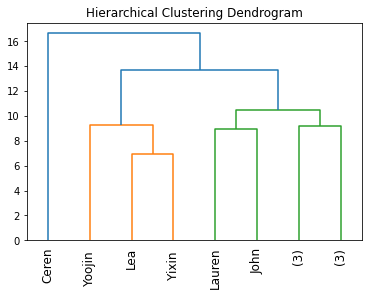

In [12]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, labels=music_indexed_by_name.index.values, truncate_mode='level', p=3)
plt.savefig('musicprefs.pdf',format='pdf')
plt.xticks(rotation=90)
plt.show()

This was helpful to see the data at the high level but we cant see where each data point  belongs. Let's plot the entiire thing

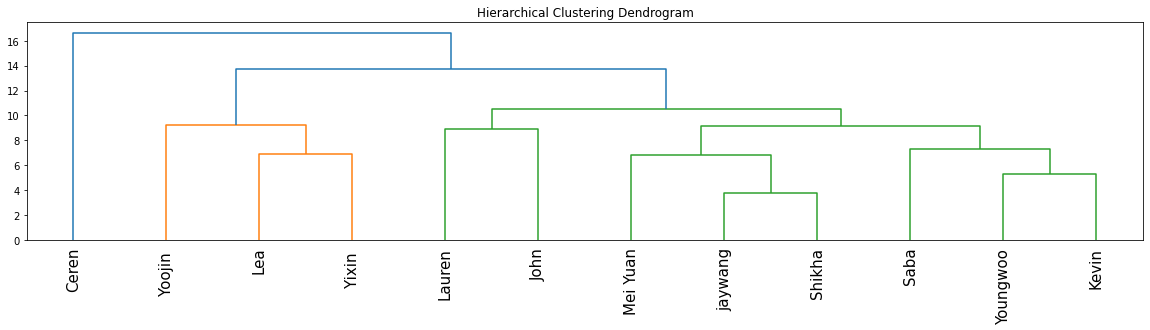

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 4)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, labels=music_indexed_by_name.index.values)
# setting the axis labels to increase font size
ax.tick_params(axis='x', which='major', labelsize=15)
plt.xticks(rotation=90)
plt.savefig('musicprefs_all.pdf',format='pdf')
plt.show()

### <font color="magenta">In class exercise: </font> 

#### Describe the characteristics of each of the clusters (i.e. use groupby() and then describe()).  Use complete sentences to interpret your results. Let's pair up and do this.

# K-Means Clustering

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
kmeans = KMeans(n_clusters=3) # start with 3 clusters
kmeans.fit(music_indexed_by_name)
print("Labels:")
print(kmeans.labels_)


Labels:
[1 1 2 1 1 0 1 1 0 0 0 0]


In [16]:
data = music_indexed_by_name.copy()

And now let's join the labels with the original dataframe:

In [17]:
data_joined = pd.concat([pd.DataFrame(kmeans.labels_).reset_index(),music.reset_index()],axis=1).drop('index',axis=1)

In [18]:
data_joined.head()

,0,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
0,1,jaywang,8,10,8,6,6,6,7,7,7,7
1,1,Mei Yuan,6,7,7,5,8,9,8,5,10,8
2,2,Ceren,10,5,1,1,1,5,10,10,8,7
3,1,Lea,6,6,9,3,9,3,3,2,9,4
4,1,Yixin,4,6,6,4,6,5,5,5,7,6


## Picking K – How many clusters?

A number of clustering methods, such as k-means, assumes the parameter k (#clusters) is known in advance, which is often not the case in practice. A number of techniques exist for determining the number of clusters in a dataset. See [this Wikipedia page](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) for a detailed discussion.

In this section, we focus on four of the approaches:

1. Educated guessing
	* What are some criteria you could use?
2. Rule of thumb
3. The Elbow Method
4. The Silhouette Approach

Let us see if all the methods listed above will be able to recover the true number of clusters.

### Rule of Thumb

By rule of thumb, we could potentially choose the number of clusters as simply


$$ k \approx \sqrt{n/2} $$

where $n$ is the number of observations.

### The Elbow Method (Scree Plot)

Here, we plot the percentage of variance explained as a function of the number of clusters.

As we increase *k*, this percentage will naturally increase. Where we see diminishing returns to increasing *k* is a good place to stop, which corresponds to the "elbow" in the graph. This is a bit of an art, since the elbow is not unambiguous.


### The Silhouette Method

The silhouette coefficient is a measure of how closely a particular datum is matched to data and how loosely it is matched to data of that neighboring cluster.

You'd therefore expect that a datum that's a good match for its cluster to have a silhouette of 1, and a data that's a poor match to have a score of -1.

We can find the average silhouette of the data for particular values of *k*, and choose the maximum.


In [19]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

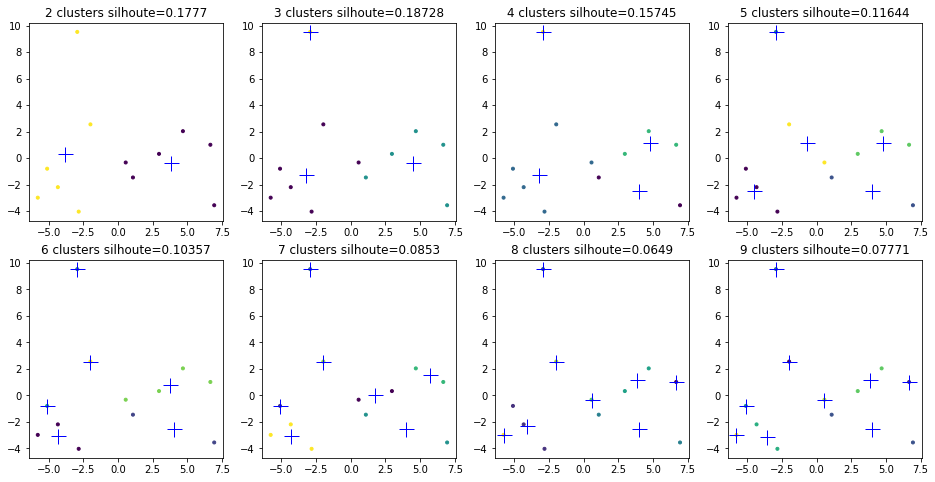

In [20]:
pca = PCA(n_components=2).fit(data.values)
data2d = pca.transform(data.values)

plt.figure(figsize=(16, 8))
scores, n_clusters, preds = [], [], []
for i in range(2, 10):
    kmean = KMeans(n_clusters = i).fit(data)
    scores.append(kmean.score(data))
    n_clusters.append(i)
    pred = kmean.predict(data)
    preds.append(pred)
    plt.subplot(2, 4, i - 1)
    plt.title(f"{i} clusters silhoute={np.round(silhouette_score(data, pred), decimals=5)}")
    plt.scatter(x=data2d[:, 0], y=data2d[:, 1], c=pred, marker = '.')
    
    centroids = kmean.cluster_centers_
    centroids2d = pca.transform(centroids)
    plt.plot(centroids2d[:, 0], centroids2d[:, 1], 'b+', markersize=15)

### Example: Use these three methods (rule of thumb, elbow, and silhouette) to determine the ideal number of clusters for a k-means clustering of our music preferences data.</font>


Hints:

* Use inertia, the within-cluster sum of squares as the criterion for the elbow method. This is [available](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) in your `k_means` result as `k_means.inertia_`.
* The silhouette score can be computed with [sklearn.metrics.silhouette\_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score). `silhouette_score` takes two arguments: `data` and `k_means.labels_`.

In [21]:
np.sqrt(len(data)/2)

2.449489742783178

(1.0, 9.35)

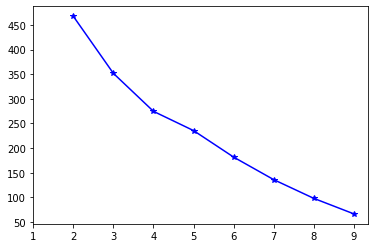

In [22]:
from sklearn import metrics

cost = []
for k in range(2,10):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(data)
    cost.append(k_means.inertia_)

fig, ax = plt.subplots()
plt.plot(range(2,10), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])


(1.0, 9.35)

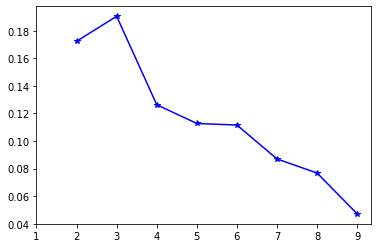

In [23]:
cost = []
for k in range(2,10):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(data)
    cost.append(metrics.silhouette_score(data, k_means.labels_))

# kIdx = np.argmax(cost)
fig, ax = plt.subplots()
plt.plot(range(2,10), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])

What did you get? Did they all agree?

# To Practice on your own

## Applying what we just learned to a Pokemon dataset

In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The dataset is from https://www.kaggle.com/alopez247/pokemon
The data file has been provided in today's files as data/pokemon_alopez247.csv.

Inspect the data. Examine the shape of the dataset (i.e. the number of rows and columns), the number of continuous variables, the number of categorical variables, and so on.  Consider computing the means, medians, etc. Provide graphical representations of the data (e.g. histograms, bar charts, scatterplots, etc.) where appropriate.

In [25]:
pokemon = pd.read_csv('data/pokemon_alopez247.csv',index_col='Name')

In [26]:
pokemon.head()

,Number,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


Fit a 3-cluster agglomerative clustering model to the pokemon data (with dummy variables).
Provide a graphical representation of the results and save the figure as a PDF file. Interpret your results.

In [27]:
# Insert your code here

Insert your interpretations here.

Fit a series of k-means models to the Pokemon dataset.

**Your values of k should range from 2 to 9.**

Select the optimal number of *k*.

Use the four methods suggested above (i.e. educated guess, rule of thumb, elbow method, and silhouette.  Provide plots for the elbow and silhouette methods.  Include 2-D plots of the centroids and individual data points for a reasonable range of *k* values (we suggest 2 to 9).  What, in your opinion, is the best choice for *k*?  What are the characteristics of each of the clusters in your solution (i.e. what characteristics do the members of each cluster have in common?)


In [28]:
# insert your code here

Insert your interpretations here.